In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predictive-maintenance-data/Predictive-Maintenance-main/README.md
/kaggle/input/predictive-maintenance-data/Predictive-Maintenance-main/Code/DataTransformation/DataTransformation.py
/kaggle/input/predictive-maintenance-data/Predictive-Maintenance-main/Code/EDA/ReadMe.txt
/kaggle/input/predictive-maintenance-data/Predictive-Maintenance-main/Datasets/test_FD004.csv
/kaggle/input/predictive-maintenance-data/Predictive-Maintenance-main/Datasets/train_FD003.csv
/kaggle/input/predictive-maintenance-data/Predictive-Maintenance-main/Datasets/test_FD002.csv
/kaggle/input/predictive-maintenance-data/Predictive-Maintenance-main/Datasets/train_FD004.csv
/kaggle/input/predictive-maintenance-data/Predictive-Maintenance-main/Datasets/train_FD001.csv
/kaggle/input/predictive-maintenance-data/Predictive-Maintenance-main/Datasets/train_FD002.csv
/kaggle/input/predictive-maintenance-data/Predictive-Maintenance-main/Datasets/test_FD003.csv
/kaggle/input/predictive-maintenance-data/Predictive

In [2]:
train_02 = pd.read_csv('/kaggle/input/predictive-maintenance-data/Predictive-Maintenance-main/Datasets/train_FD002.csv')
train_02.head()

Engine  Cycles  Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  \
0       1       1  34.9983   0.8400    100.0   449.44   555.32  1358.61   
1       1       2  41.9982   0.8408    100.0   445.00   549.90  1353.22   
2       1       3  24.9988   0.6218     60.0   462.54   537.31  1256.76   
3       1       4  42.0077   0.8416    100.0   445.00   549.51  1354.03   
4       1       5  25.0005   0.6203     60.0   462.54   537.07  1257.71   

   Sensor7  Sensor8  ...  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  \
0  1137.23     5.48  ...   2387.72   8048.56    9.3461      0.02       334   
1  1125.78     3.91  ...   2387.66   8072.30    9.3774      0.02       330   
2  1047.45     7.05  ...   2028.03   7864.87   10.8941      0.02       309   
3  1126.38     3.91  ...   2387.61   8068.66    9.3528      0.02       329   
4  1047.93     7.05  ...   2028.00   7861.23   10.8963      0.02       309   

   Sensor21  Sensor22  Sensor23  Sensor24  Remaining Cycles  
0      2223    100.00     14.73    8.8071               148  
1      2212    100.00     10.41    6.2665               147  
2      1915     84.93     14.08    8.6723               146  
3      2212    100.00     10.59    6.4701               145  
4      1915     84.93     14.13    8.5286               144  

[5 rows x 27 columns]

In [3]:
train_02.shape

(53759, 27)

In [4]:
test_02 = pd.read_csv('/kaggle/input/predictive-maintenance-data/Predictive-Maintenance-main/Datasets/test_FD002.csv')
test_02.head()

Engine  Cycles  Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  \
0       1       1   9.9987   0.2502    100.0   489.05   605.03  1497.17   
1       1       2  20.0026   0.7000    100.0   491.19   607.82  1481.20   
2       1       3  35.0045   0.8400    100.0   449.44   556.00  1359.08   
3       1       4  42.0066   0.8410    100.0   445.00   550.17  1349.69   
4       1       5  24.9985   0.6213     60.0   462.54   536.72  1253.18   

   Sensor7  Sensor8  ...  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  \
0  1304.99    10.52  ...   2388.18   8114.10    8.6476      0.03       369   
1  1246.11     9.35  ...   2388.12   8053.06    9.2405      0.02       364   
2  1128.36     5.48  ...   2387.75   8053.04    9.3472      0.02       333   
3  1127.89     3.91  ...   2387.72   8066.90    9.3961      0.02       332   
4  1050.69     7.05  ...   2028.05   7865.66   10.8682      0.02       305   

   Sensor21  Sensor22  Sensor23  Sensor24  Remaining Cycles  
0      2319    100.00     28.42   17.1551               275  
1      2324    100.00     24.29   14.8039               274  
2      2223    100.00     14.98    8.9125               273  
3      2212    100.00     10.35    6.4181               272  
4      1915     84.93     14.31    8.5740               271  

[5 rows x 27 columns]

In [5]:
test_02.shape

(33991, 27)

In [6]:
train_02.head(2)

Engine  Cycles  Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  \
0       1       1  34.9983   0.8400    100.0   449.44   555.32  1358.61   
1       1       2  41.9982   0.8408    100.0   445.00   549.90  1353.22   

   Sensor7  Sensor8  ...  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  \
0  1137.23     5.48  ...   2387.72   8048.56    9.3461      0.02       334   
1  1125.78     3.91  ...   2387.66   8072.30    9.3774      0.02       330   

   Sensor21  Sensor22  Sensor23  Sensor24  Remaining Cycles  
0      2223     100.0     14.73    8.8071               148  
1      2212     100.0     10.41    6.2665               147  

[2 rows x 27 columns]

In [7]:
train_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine            53759 non-null  int64  
 1   Cycles            53759 non-null  int64  
 2   Sensor1           53759 non-null  float64
 3   Sensor2           53759 non-null  float64
 4   Sensor3           53759 non-null  float64
 5   Sensor4           53759 non-null  float64
 6   Sensor5           53759 non-null  float64
 7   Sensor6           53759 non-null  float64
 8   Sensor7           53759 non-null  float64
 9   Sensor8           53759 non-null  float64
 10  Sensor9           53759 non-null  float64
 11  Sensor10          53759 non-null  float64
 12  Sensor11          53759 non-null  float64
 13  Sensor12          53759 non-null  float64
 14  Sensor13          53759 non-null  float64
 15  Sensor14          53759 non-null  float64
 16  Sensor15          53759 non-null  float6

In [8]:
train_02.isnull().sum()

Engine              0
Cycles              0
Sensor1             0
Sensor2             0
Sensor3             0
Sensor4             0
Sensor5             0
Sensor6             0
Sensor7             0
Sensor8             0
Sensor9             0
Sensor10            0
Sensor11            0
Sensor12            0
Sensor13            0
Sensor14            0
Sensor15            0
Sensor16            0
Sensor17            0
Sensor18            0
Sensor19            0
Sensor20            0
Sensor21            0
Sensor22            0
Sensor23            0
Sensor24            0
Remaining Cycles    0
dtype: int64

In [9]:
train_02.describe()

Engine        Cycles       Sensor1       Sensor2       Sensor3  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean     131.082981    109.154746     23.998407      0.572056     94.046020   
std       74.463862     69.180569     14.747376      0.310016     14.237735   
min        1.000000      1.000000      0.000000      0.000000     60.000000   
25%       68.000000     52.000000     10.004600      0.250700    100.000000   
50%      131.000000    104.000000     25.001300      0.700000    100.000000   
75%      195.000000    157.000000     41.998000      0.840000    100.000000   
max      260.000000    378.000000     42.008000      0.842000    100.000000   

            Sensor4       Sensor5       Sensor6       Sensor7       Sensor8  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean     472.910207    579.672399   1419.971013   1205.442024      8.031986   
std       26.389707     37.289399    105.946341    119.123428      3.613839   
min      445.000000    535.530000   1243.730000   1023.770000      3.910000   
25%      445.000000    549.570000   1352.760000   1123.655000      3.910000   
50%      462.540000    555.980000   1369.180000   1138.890000      7.050000   
75%      491.190000    607.340000   1499.370000   1306.850000     10.520000   
max      518.670000    644.520000   1612.880000   1439.230000     14.620000   

       ...      Sensor16      Sensor17      Sensor18      Sensor19  \
count  ...  53759.000000  53759.000000  53759.000000  53759.000000   
mean   ...   2334.557253   8066.597682      9.329654      0.023326   
std    ...    128.068271     84.837950      0.749335      0.004711   
min    ...   2027.610000   7848.360000      8.335700      0.020000   
25%    ...   2387.900000   8062.140000      8.677800      0.020000   
50%    ...   2388.080000   8082.540000      9.310900      0.020000   
75%    ...   2388.170000   8127.195000      9.386900      0.030000   
max    ...   2390.480000   8268.500000     11.066900      0.030000   

           Sensor20      Sensor21      Sensor22      Sensor23      Sensor24  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean     348.309511   2228.806358     97.756838     20.789296     12.473423   
std       27.754515    145.327980      5.364067      9.869331      5.921615   
min      303.000000   1915.000000     84.930000     10.180000      6.010500   
25%      331.000000   2212.000000    100.000000     10.910000      6.546300   
50%      335.000000   2223.000000    100.000000     14.880000      8.929200   
75%      369.000000   2324.000000    100.000000     28.470000     17.083200   
max      399.000000   2388.000000    100.000000     39.340000     23.590100   

       Remaining Cycles  
count      53759.000000  
mean         108.154746  
std           69.180569  
min            0.000000  
25%           51.000000  
50%          103.000000  
75%          156.000000  
max          377.000000  

[8 rows x 27 columns]

In [10]:
train_02['Cycles'].value_counts()

Cycles
1      260
66     260
96     260
2      260
94     260
      ... 
370      1
369      1
367      1
366      1
378      1
Name: count, Length: 378, dtype: int64

In [11]:
train_02['Remaining Cycles'].value_counts()

Remaining Cycles
34     260
38     260
54     260
53     260
52     260
      ... 
373      1
374      1
376      1
377      1
365      1
Name: count, Length: 378, dtype: int64

In [12]:
train_02['Engine'].value_counts()

Engine
112    378
88     365
85     347
118    344
31     343
      ... 
69     136
252    135
192    133
120    129
244    128
Name: count, Length: 260, dtype: int64

# Distribution of Cycles

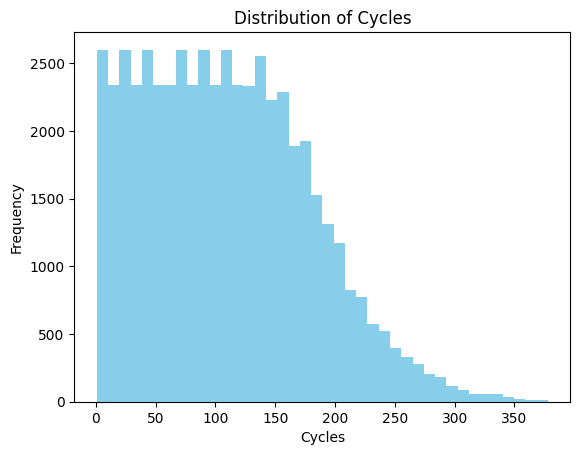

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'Cycles'
plt.hist(train_02['Cycles'], bins=40, color='skyblue')
plt.xlabel('Cycles')
plt.ylabel('Frequency')
plt.title('Distribution of Cycles')
plt.show()

# Distribution of Remaining Cycles

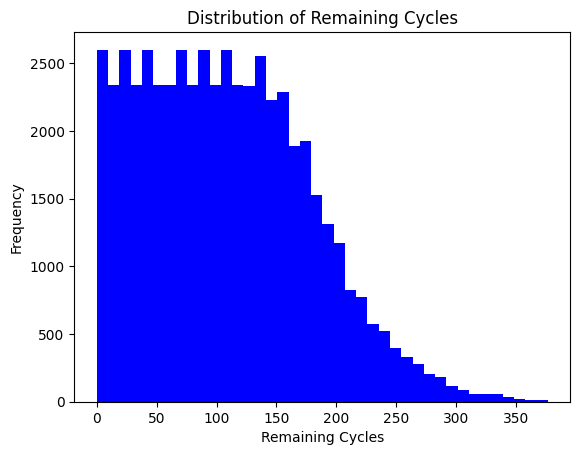

In [14]:
# Histogram for 'Remaining Cycles'
plt.hist(train_02['Remaining Cycles'], bins=40, color='blue')
plt.xlabel('Remaining Cycles')
plt.ylabel('Frequency')
plt.title('Distribution of Remaining Cycles')
plt.show()

# Distribution of Engine

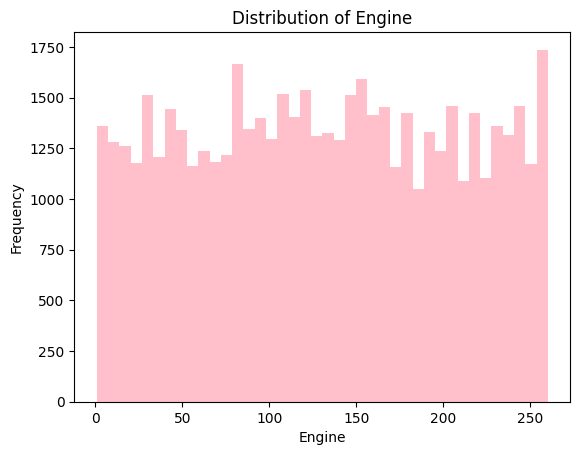

In [15]:
# Histogram for 'Engine'
plt.hist(train_02['Engine'], bins=40, color='pink')
plt.xlabel('Engine')
plt.ylabel('Frequency')
plt.title('Distribution of Engine')
plt.show()

# Boxplot of Sensor Readings(1-4)

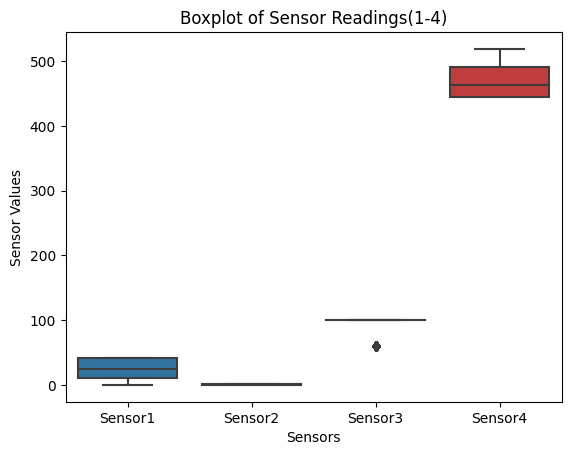

In [16]:
import seaborn as sns

# Boxplot for Sensor1 to Sensor4
sns.boxplot(data=train_02[['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4']])
plt.title('Boxplot of Sensor Readings(1-4)')
plt.ylabel('Sensor Values')
plt.xlabel('Sensors')
plt.show()

# Boxplot of Sensor Readings(5-8)

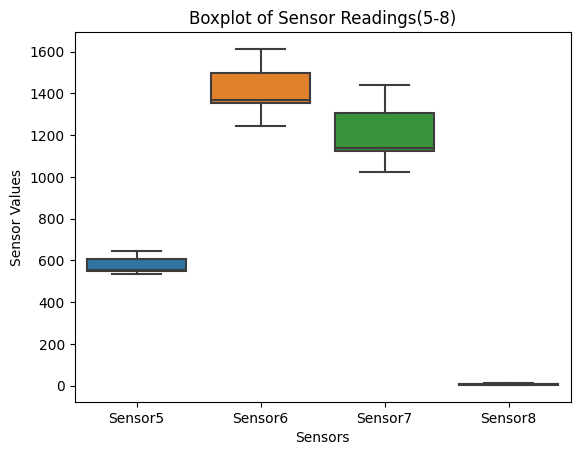

In [17]:
# Boxplot for Sensor5 to Sensor8
sns.boxplot(data=train_02[['Sensor5', 'Sensor6', 'Sensor7', 'Sensor8']])
plt.title('Boxplot of Sensor Readings(5-8)')
plt.ylabel('Sensor Values')
plt.xlabel('Sensors')
plt.show()

# Boxplot of Sensor Readings(9-12)

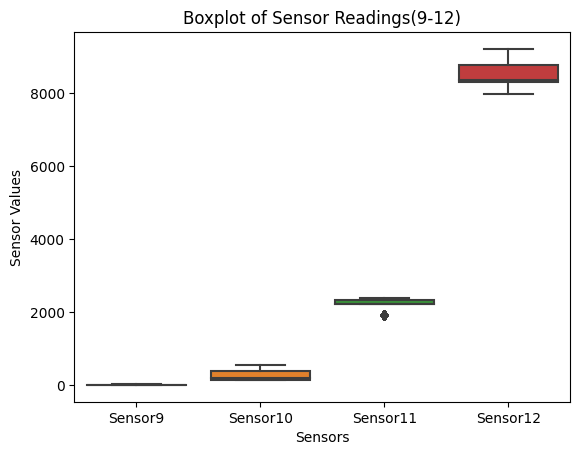

In [18]:
# Boxplot for Sensor9 to Sensor12
sns.boxplot(data=train_02[['Sensor9', 'Sensor10', 'Sensor11', 'Sensor12']])
plt.title('Boxplot of Sensor Readings(9-12)')
plt.ylabel('Sensor Values')
plt.xlabel('Sensors')
plt.show()

# Boxplot of Sensor Readings(13-16)

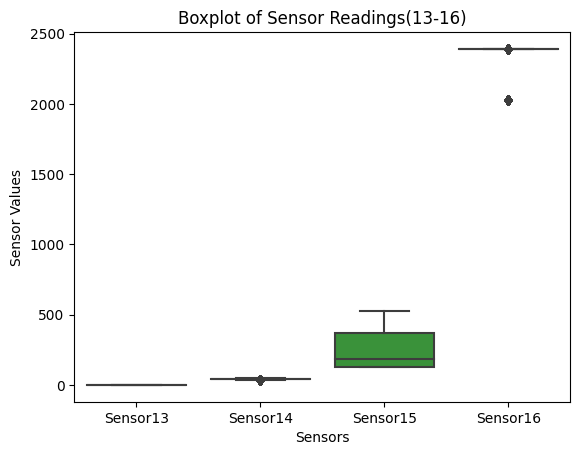

In [19]:
# Boxplot for Sensor13 to Sensor16
sns.boxplot(data=train_02[['Sensor13', 'Sensor14', 'Sensor15', 'Sensor16']])
plt.title('Boxplot of Sensor Readings(13-16)')
plt.ylabel('Sensor Values')
plt.xlabel('Sensors')
plt.show()

# Boxplot of Sensor Readings(17-20)

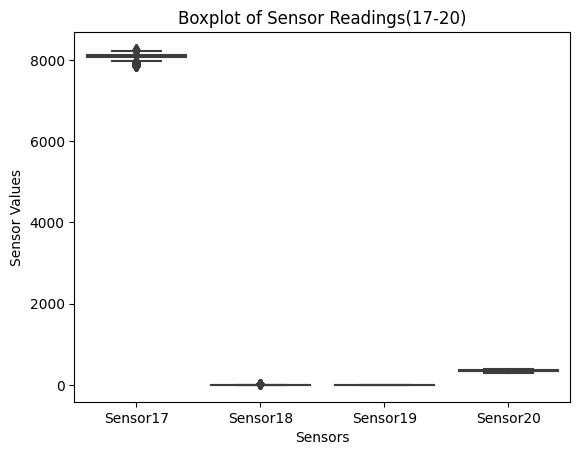

In [20]:
# Boxplot for Sensor17 to Sensor20
sns.boxplot(data=train_02[['Sensor17', 'Sensor18', 'Sensor19', 'Sensor20']])
plt.title('Boxplot of Sensor Readings(17-20)')
plt.ylabel('Sensor Values')
plt.xlabel('Sensors')
plt.show()

# Boxplot of Sensor Readings(21-24)

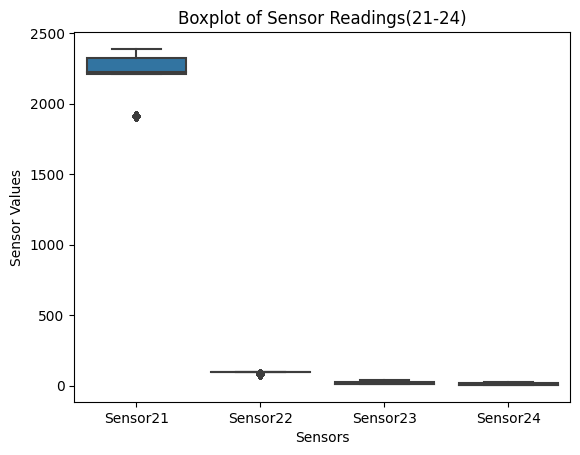

In [21]:
# Boxplot for Sensor21 to Sensor24
sns.boxplot(data=train_02[['Sensor21', 'Sensor22', 'Sensor23', 'Sensor24']])
plt.title('Boxplot of Sensor Readings(21-24)')
plt.ylabel('Sensor Values')
plt.xlabel('Sensors')
plt.show()

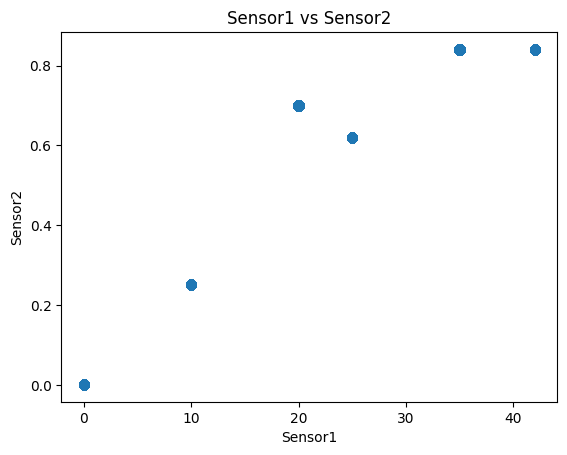

In [22]:
# Scatter plot between Sensor1 and Sensor2
plt.scatter(train_02['Sensor1'], train_02['Sensor2'], alpha=0.3)
plt.title('Sensor1 vs Sensor2')
plt.xlabel('Sensor1')
plt.ylabel('Sensor2')
plt.show()

# remaining cycles against each sensor reading

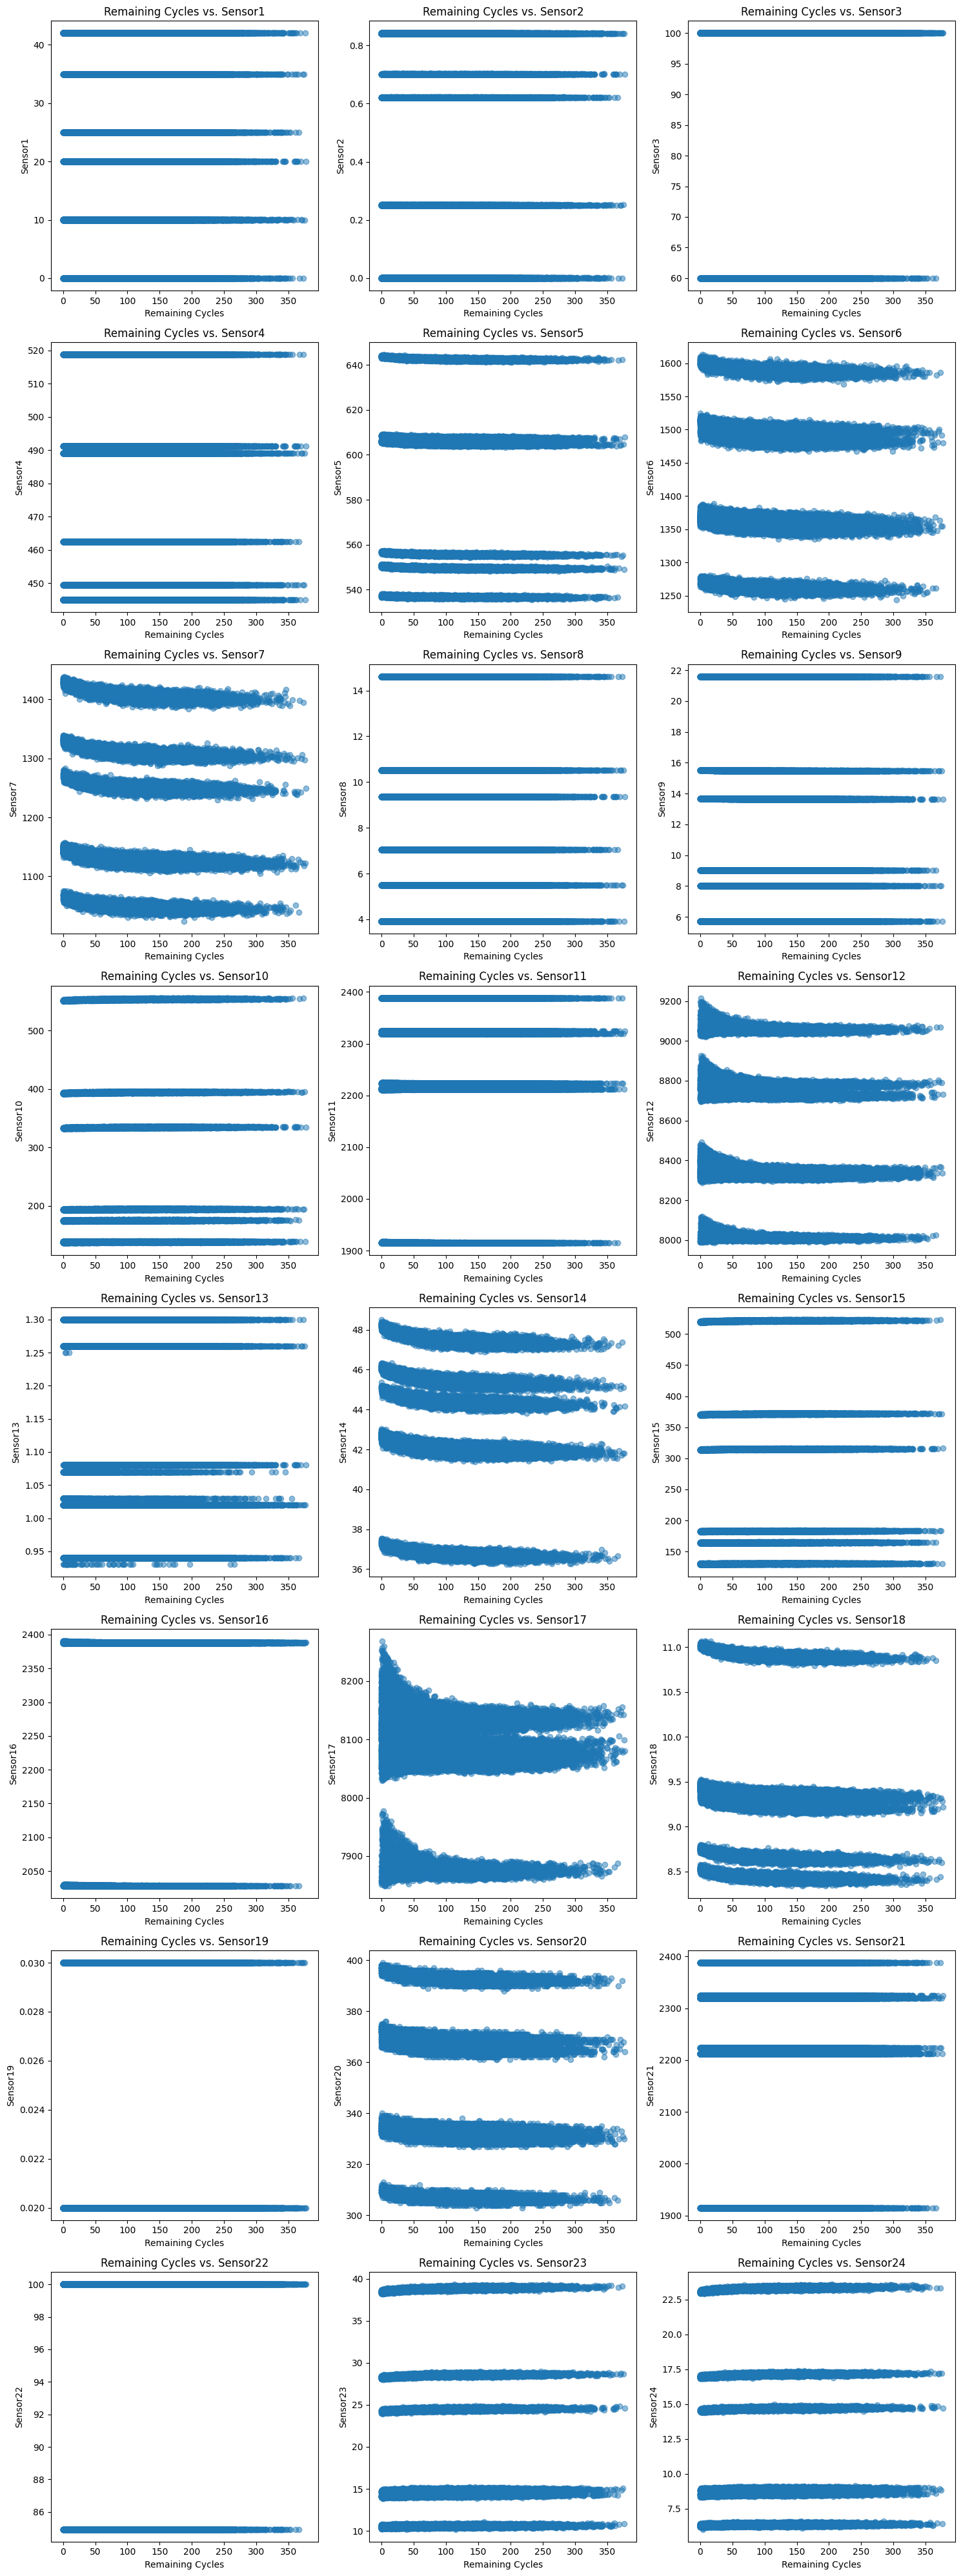

In [23]:
import matplotlib.pyplot as plt

# Define the number of subplots per row
num_subplots_per_row = 3

# Calculate the number of rows needed
num_rows = (24 + num_subplots_per_row - 1) // num_subplots_per_row

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plot for Cycles vs. each Sensor Reading
for i in range(1, 25):  # Loop through Sensor1 to Sensor24
    sensor_col = f'Sensor{i}'
    ax = axes[i - 1]  # Get the corresponding axis
    ax.scatter(train_02['Remaining Cycles'], train_02[sensor_col], alpha=0.5)
    ax.set_xlabel('Remaining Cycles')
    ax.set_ylabel(sensor_col)
    ax.set_title(f'Remaining Cycles vs. {sensor_col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# cycles against each sensor reading

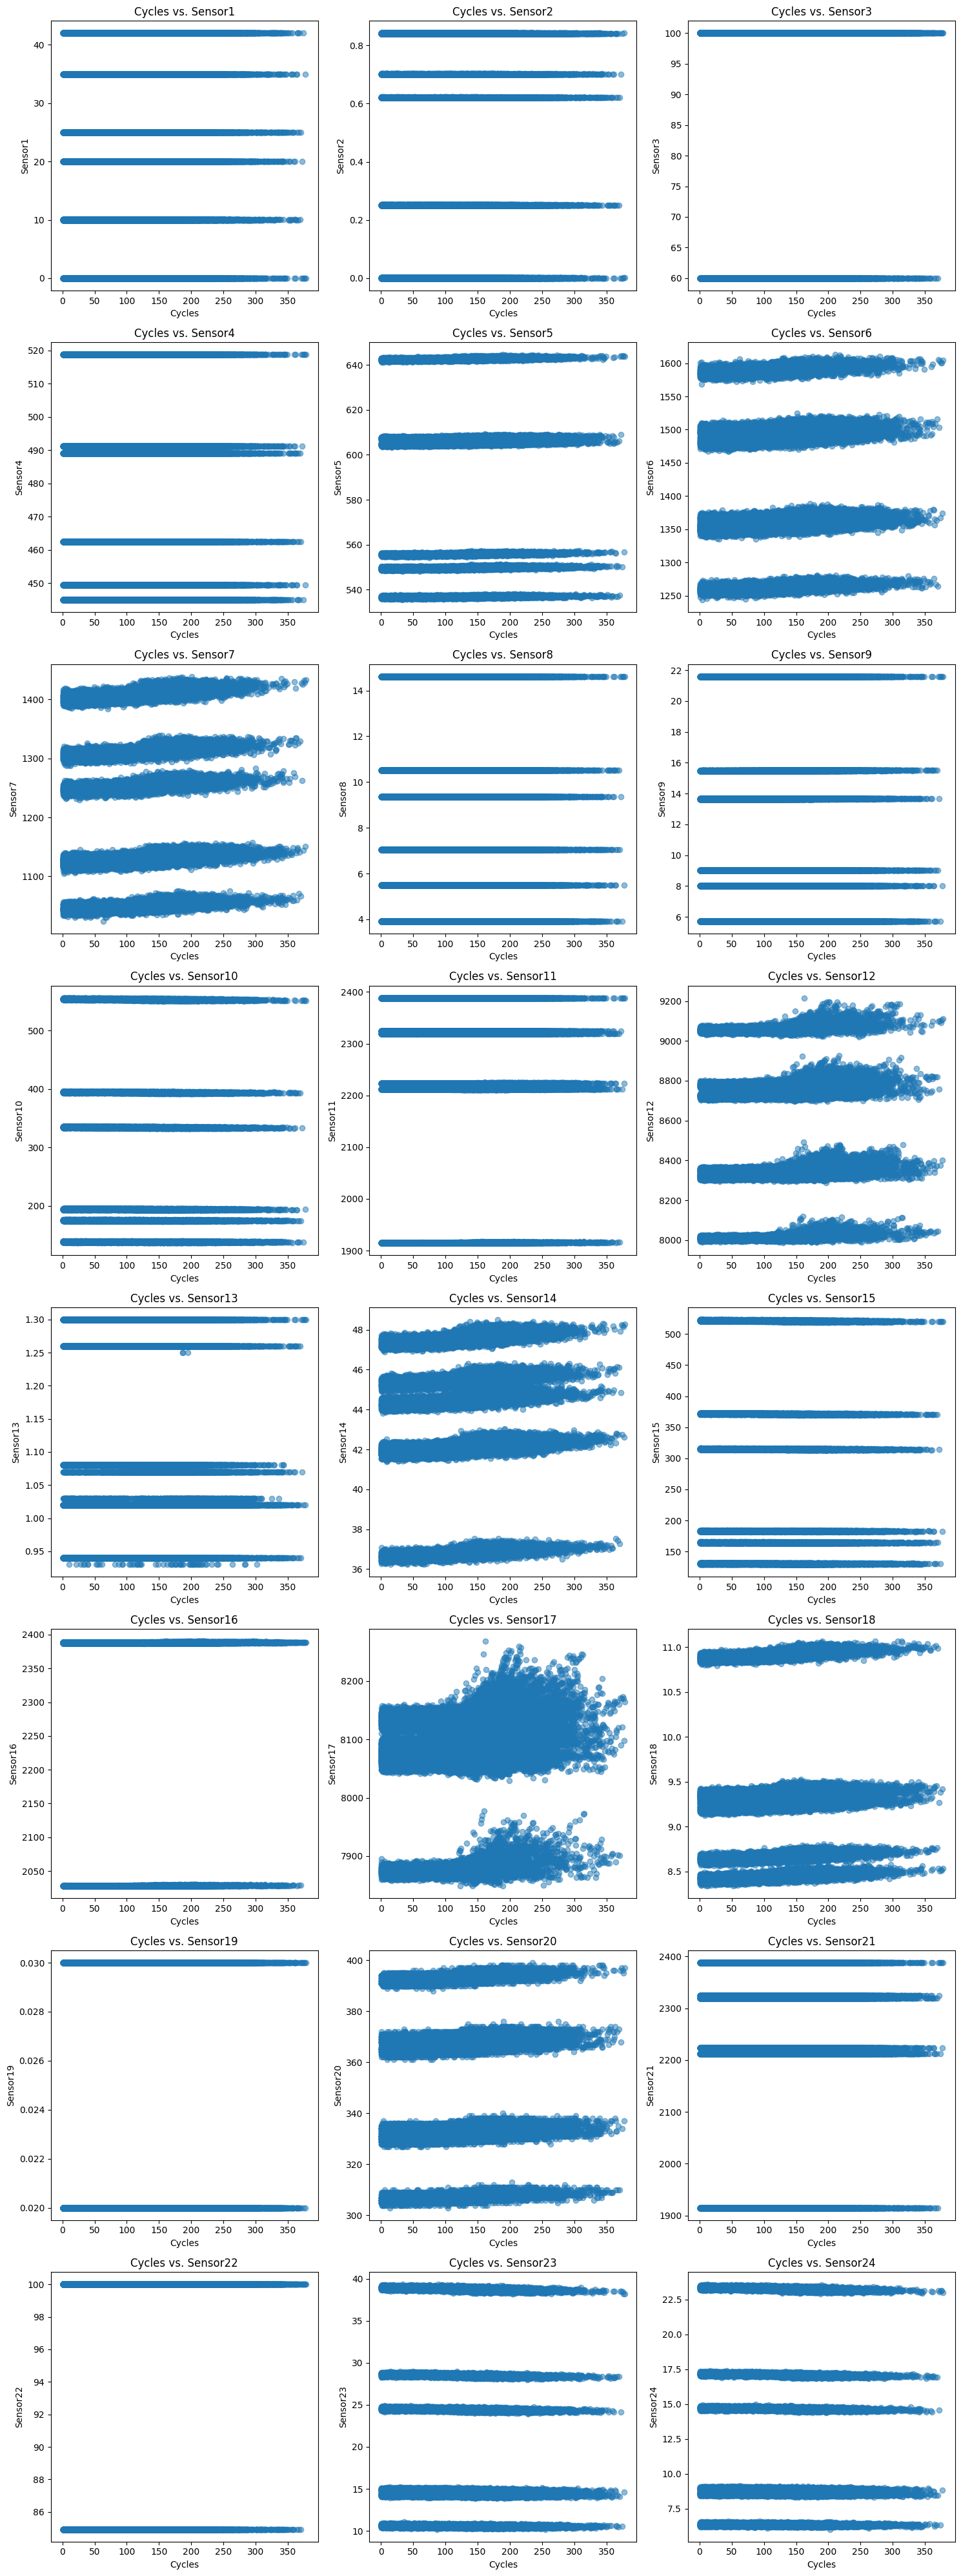

In [24]:
import matplotlib.pyplot as plt

# Define the number of subplots per row
num_subplots_per_row = 3

# Calculate the number of rows needed
num_rows = (24 + num_subplots_per_row - 1) // num_subplots_per_row

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plot for Cycles vs. each Sensor Reading
for i in range(1, 25):  # Loop through Sensor1 to Sensor24
    sensor_col = f'Sensor{i}'
    ax = axes[i - 1]  # Get the corresponding axis
    ax.scatter(train_02['Cycles'], train_02[sensor_col], alpha=0.5)
    ax.set_xlabel('Cycles')
    ax.set_ylabel(sensor_col)
    ax.set_title(f'Cycles vs. {sensor_col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# engine against each sensor reading

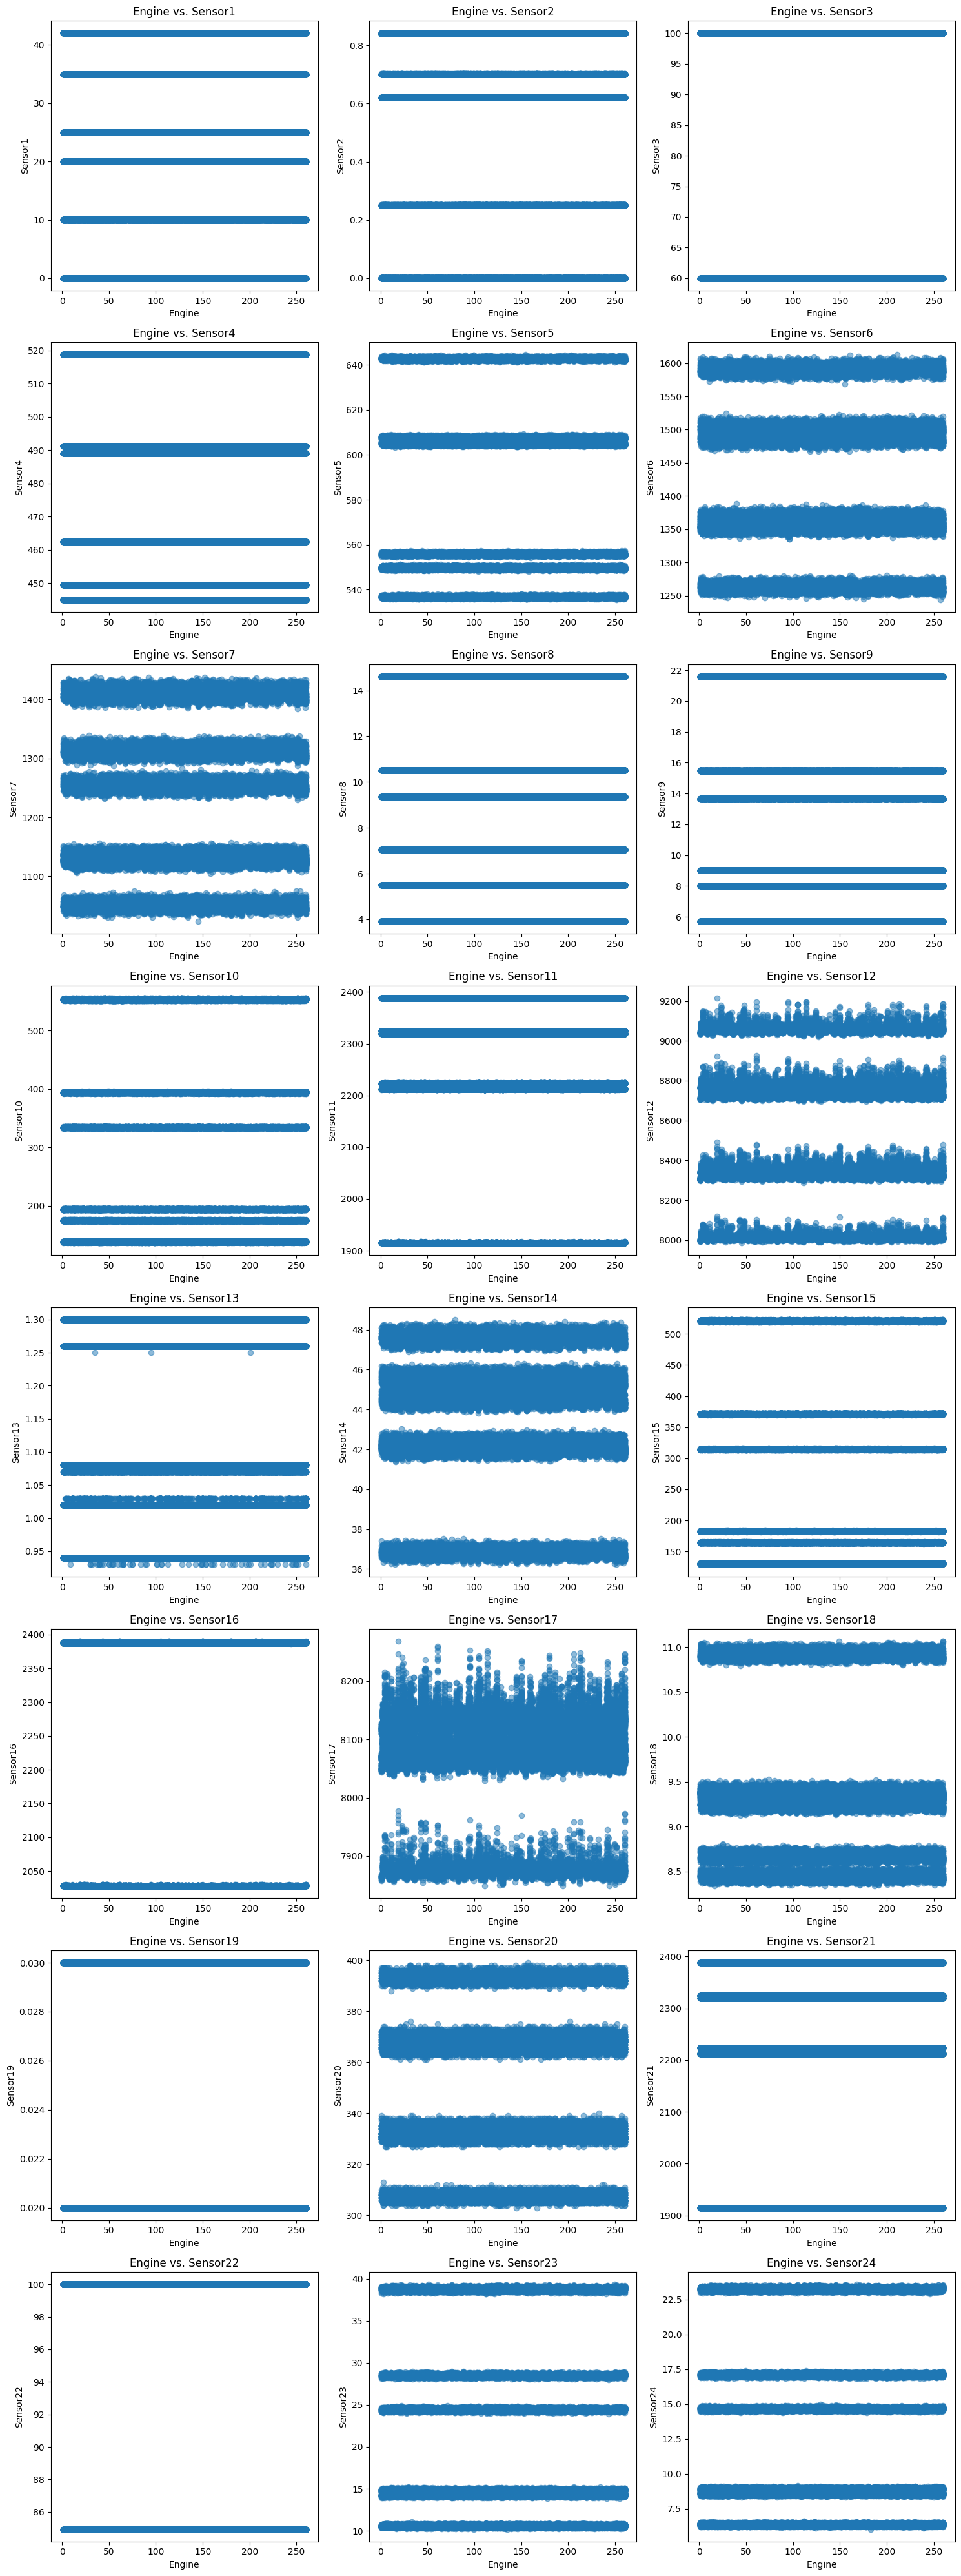

In [25]:
import matplotlib.pyplot as plt

# Define the number of subplots per row
num_subplots_per_row = 3

# Calculate the number of rows needed
num_rows = (24 + num_subplots_per_row - 1) // num_subplots_per_row

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plot for Cycles vs. each Sensor Reading
for i in range(1, 25):  # Loop through Sensor1 to Sensor24
    sensor_col = f'Sensor{i}'
    ax = axes[i - 1]  # Get the corresponding axis
    ax.scatter(train_02['Engine'], train_02[sensor_col], alpha=0.5)
    ax.set_xlabel('Engine')
    ax.set_ylabel(sensor_col)
    ax.set_title(f'Engine vs. {sensor_col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Histograms of Sensor Readings

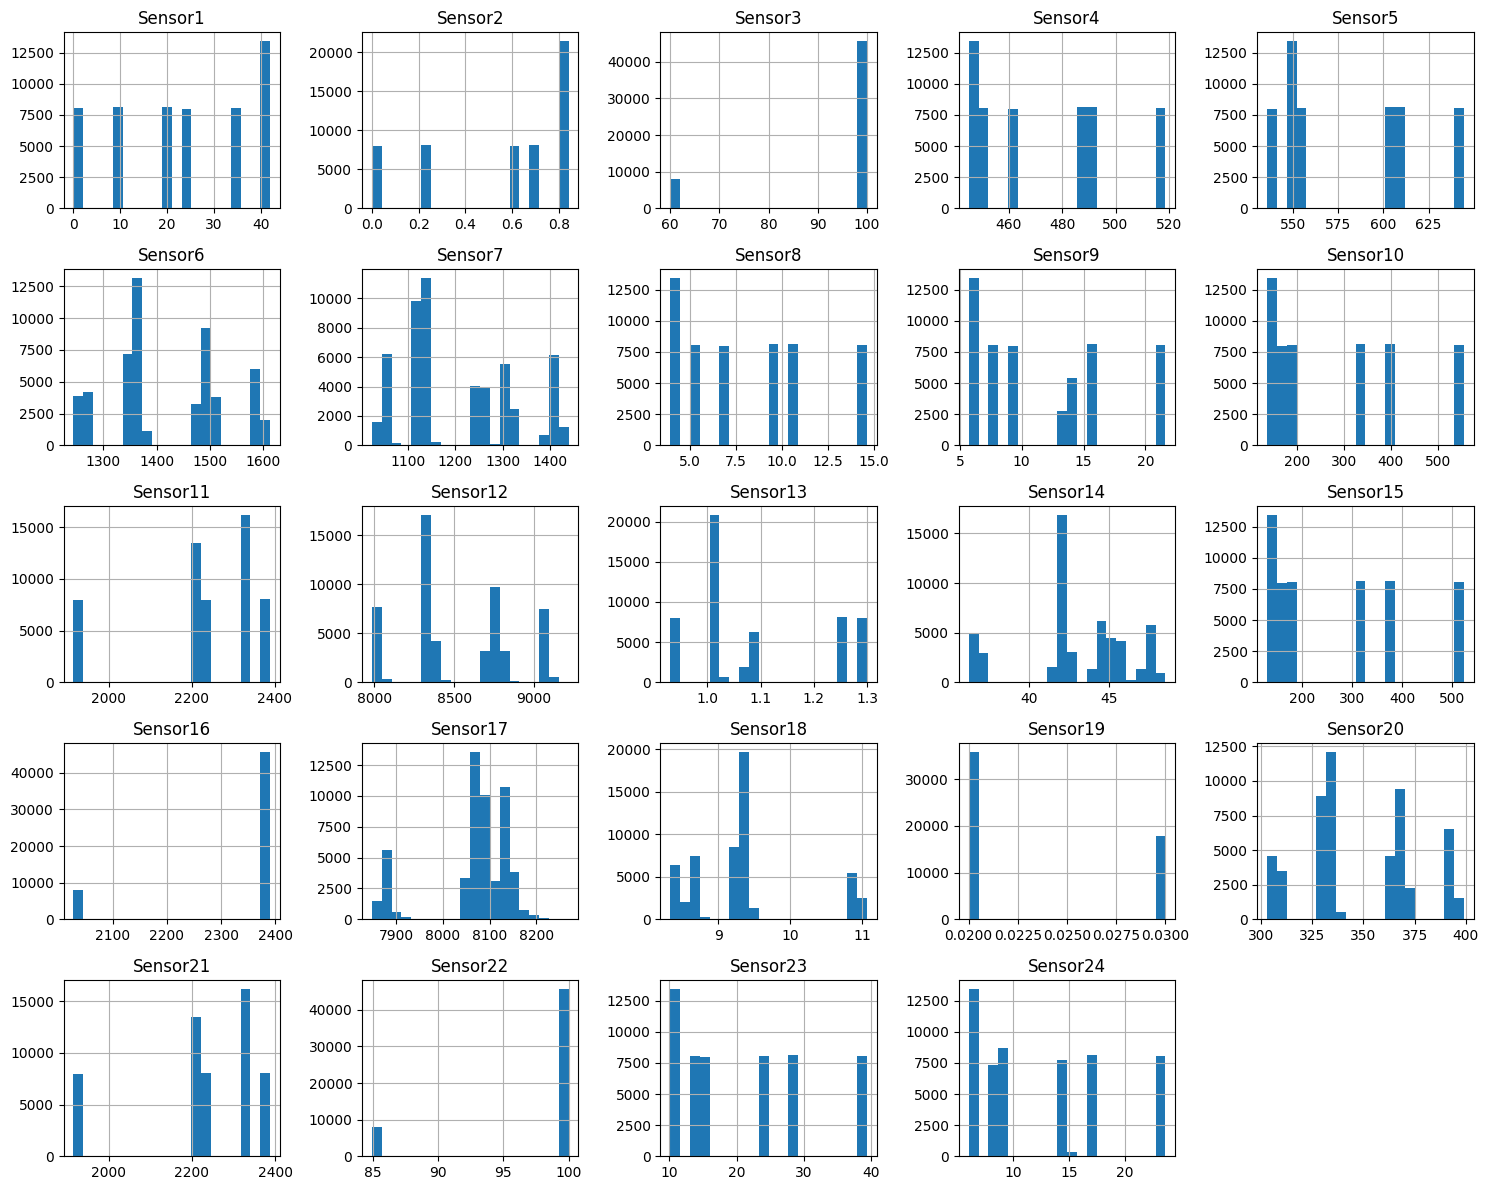

In [26]:
import matplotlib.pyplot as plt

# Plot histograms for each sensor reading
train_02.drop(columns=['Engine', 'Cycles', 'Remaining Cycles']).hist(bins=20, figsize=(15, 12))
plt.tight_layout()
plt.show()

# Box Plots of Sensor Readings

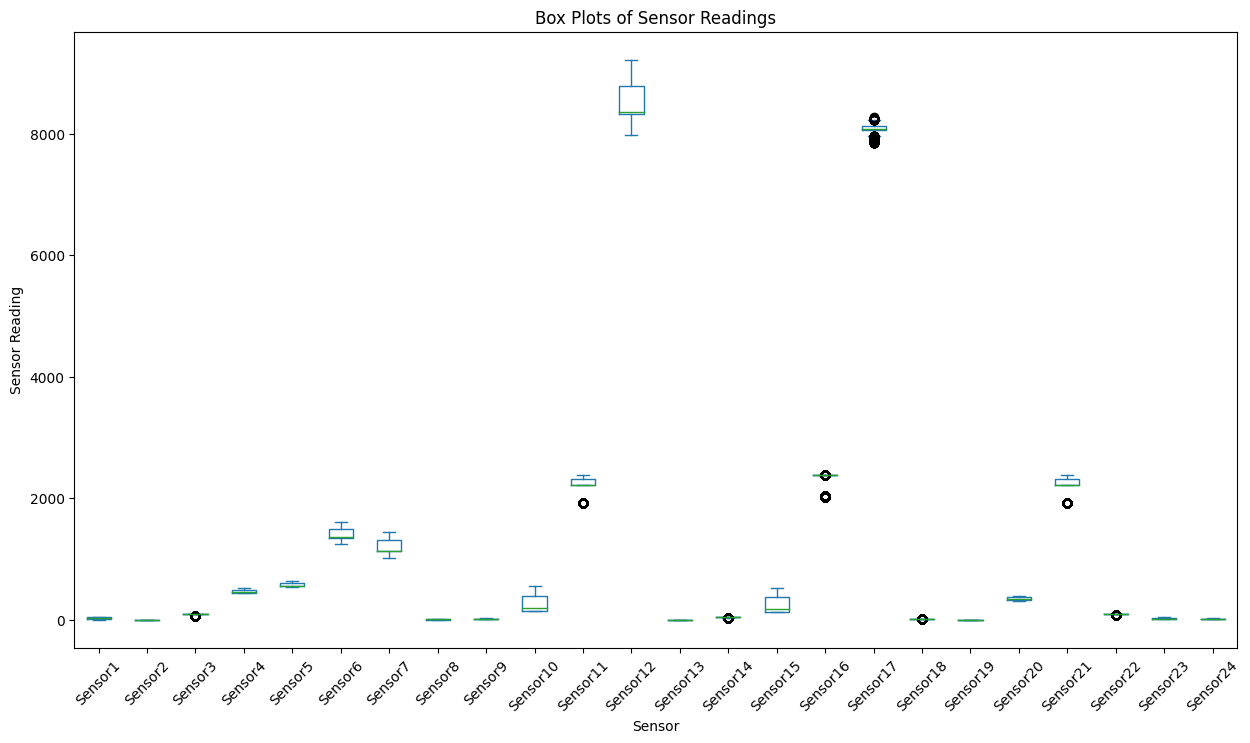

In [27]:
import matplotlib.pyplot as plt

# Plot box plots for each sensor reading
train_02.drop(columns=['Engine', 'Cycles', 'Remaining Cycles']).plot(kind='box', figsize=(15, 8))
plt.title('Box Plots of Sensor Readings')
plt.ylabel('Sensor Reading')
plt.xlabel('Sensor')
plt.xticks(rotation=45)
plt.show()

#  correlation between different sensors and remaining cycles

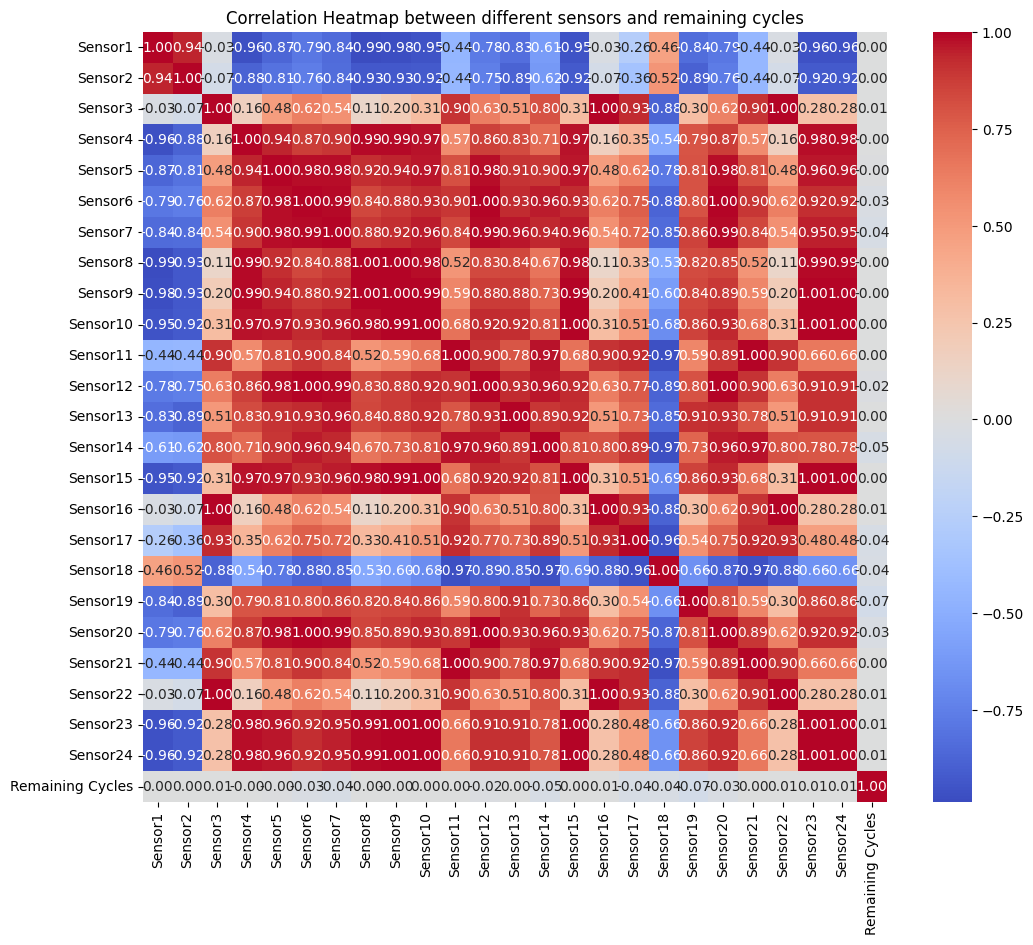

In [28]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = train_02.drop(columns=['Engine', 'Cycles']).corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between different sensors and remaining cycles')
plt.show()

#  correlation between different sensors and cycles

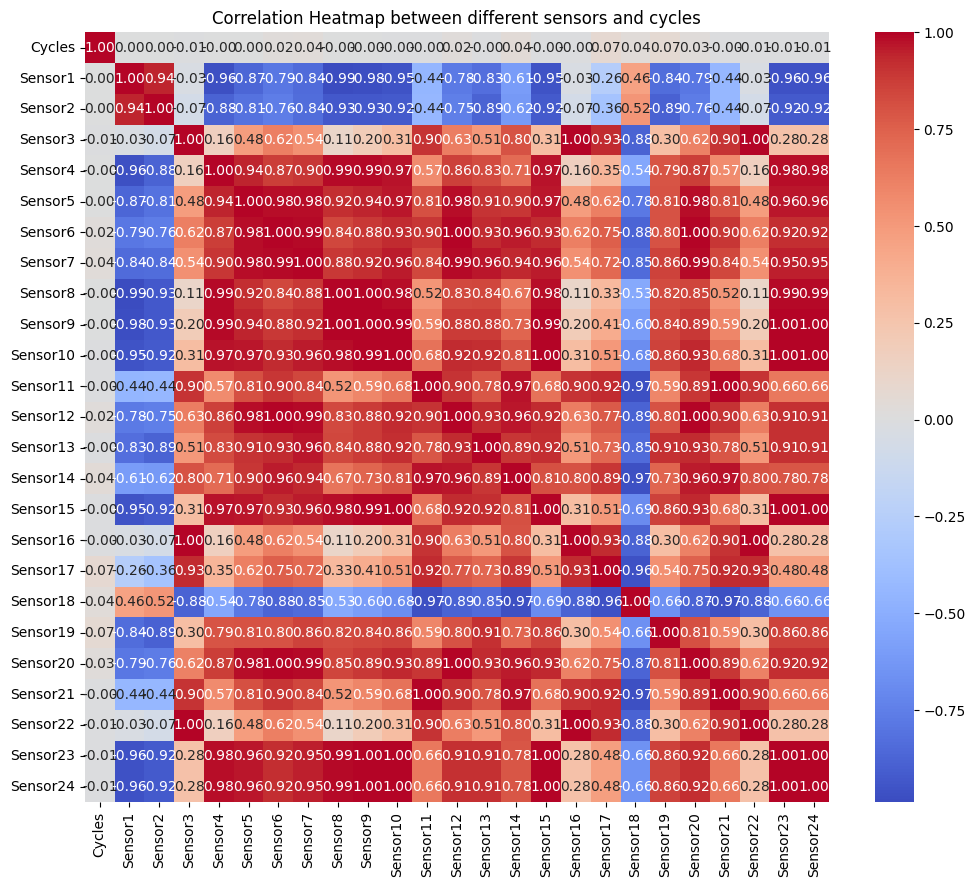

In [29]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = train_02.drop(columns=['Engine', 'Remaining Cycles']).corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between different sensors and cycles')
plt.show()